<a href="https://colab.research.google.com/github/thanadolch/AI_Prototype/blob/main/Cloud_DB_and_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install azure-data-tables

#Azure Table (Cloud DB)

In [ ]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [ ]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=aiprototypemeenters;AccountKey=kTyZBos6m0iTthtPluCX2sz/OmEPbFXAIcq4LVk4cRhv3IGZeVDGP/Pk1PozIQx+BeeHTgeLjDt5TMpD9iVOOQ==;EndpointSuffix=core.windows.net')

Insert Data

In [ ]:
table_client = table_service.get_table_client(table_name="testking")

##Query

##query by partitionkey and rowkey (เลือกข้อมูล)

In [ ]:
table_client = table_service.get_table_client(table_name="testking")

In [ ]:
task = table_client.get_entity('part1', '007')
print(task)

{'PartitionKey': 'part1', 'RowKey': '007', 'name': 'stat', 'age': 30}


##query by partitionkey and rowkey (ดึงข้อมูลมาประมวลผลต่อ)

In [ ]:
tasks = table_client.query_entities(query_filter='age gt 7')
for task in tasks:
    print(task)

{'PartitionKey': 'part0', 'RowKey': '0018', 'name': 'CSS', 'room': 'online', 'age': 8}
{'PartitionKey': 'part0', 'RowKey': '0019', 'name': 'CSS', 'room': 'online', 'age': 9}
{'PartitionKey': 'part1', 'RowKey': '007', 'name': 'stat', 'age': 30}


#Cloud AI

In [ ]:
!pip install azure-cognitiveservices-vision-computervision

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

credentials = CognitiveServicesCredentials('42d975d0aeb94b0a87c22608fffcee88')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [ ]:
url = "https://aiprototypemeenters.blob.core.windows.net/pics/272777457_1152516095495007_2670343438702774638_n.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 8, 'gender': <Gender.male: 'Male'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7f62f9541990>}


In [ ]:
print(tag.face_rectangle.height,tag.face_rectangle.width,tag.face_rectangle.top,tag.face_rectangle.left)

246 246 352 190


In [ ]:
import cv2

In [ ]:
from matplotlib import pyplot as plt

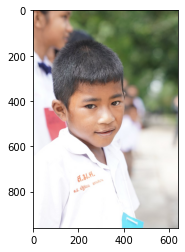

In [ ]:
img = cv2.imread('/content/272777457_1152516095495007_2670343438702774638_n (1).jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img2 = cv2.rectangle(img, (tag.face_rectangle.left, tag.face_rectangle.top),
            (tag.face_rectangle.left+tag.face_rectangle.width,tag.face_rectangle.top+tag.face_rectangle.height),(0,0,255),5)

8
Gender.male


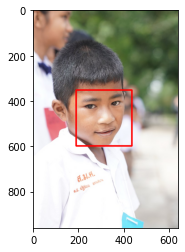

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)